In [25]:
# загрузим библиотеки
# данные библиотеки являются стандартными для пакета Anaconda
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
#данная строчка нужна для корректного отображения графиков
%matplotlib inline 

In [26]:
df=pd.read_excel('на душу населення.xlsx', sheet_name='Лист2') #!!!!!! измените имя файла и название рабочего листа
df.sample(5) #эта команда выведет пять случайных строк таблицы, таблица не отобразиться полностью

,Країна,Офшорні статки,ВВП на душу насел,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження
14,Нідерланди,21873.267160,52248,623.179081,54.973242,568.205839,11468.119979
26,Швеція,5496.442926,51796,273.141311,115.498265,157.643047,18411.277091
15,Німеччина,5795.701595,45733,428.550425,298.152224,130.398201,10333.961753
2,Болгарія,451.673757,9919,5.875764,3.593385,2.282379,1789.022080
4,Данія,7066.733072,60494,319.457344,122.052712,197.404632,27047.243287


In [27]:
df.info() # информация о столбцах таблицы и типах меременных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Країна                     27 non-null     object 
 1   Офшорні статки             27 non-null     float64
 2   ВВП на душу насел          27 non-null     int64  
 3   Загальні податкові втрати  27 non-null     float64
 4   Втрати від под. уникнення  27 non-null     float64
 5   Втрати від под. ухилення   27 non-null     float64
 6   Податк. надходження        27 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.6+ KB


In [28]:
df.describe()

,Офшорні статки,ВВП на душу насел,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,41390.148505,34906.296296,1037.040863,100.102895,936.937968,8867.539368
std,156442.930253,24051.011242,3751.686963,183.965440,3582.718818,7334.148535
min,127.580188,9919.000000,5.875764,2.837858,0.637223,1789.022080
25%,835.210789,18370.500000,47.139305,34.131691,8.848472,3424.930047
50%,2747.652342,27054.000000,114.942338,46.956120,59.388229,5377.200744
75%,6431.217333,46943.500000,330.852771,83.682592,177.523839,12556.858893
max,813101.818939,116921.000000,19570.584732,959.767058,18610.817675,30058.989453


In [29]:
df.columns #ниже выводит список столцов, удобно для копирования

Index(['Країна', 'Офшорні статки', 'ВВП на душу насел',
       'Загальні податкові втрати', 'Втрати від под. уникнення',
       'Втрати від под. ухилення', 'Податк. надходження'],
      dtype='object')

In [30]:
col=['Офшорні статки', 'ВВП на душу насел', 'Загальні податкові втрати', 'Втрати від под. уникнення', 'Втрати від под. ухилення', 'Податк. надходження'] # !!!!!! укажите количественные (int, float) столбцы, 
#                                       по которым выполним кластеризацию

In [31]:
pd.options.mode.chained_assignment = None 
df[col].fillna(0, inplace=True)

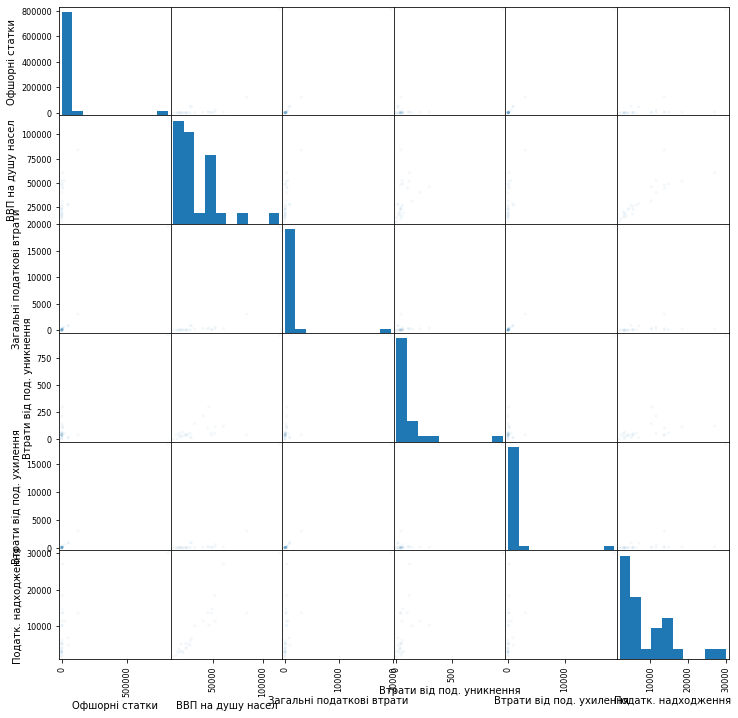

In [32]:
# матрица рассеяния и гистограммы
from pandas.plotting import scatter_matrix
scatter_matrix(df[col], alpha=0.05, figsize=(12, 12));

In [33]:
df[col].corr() # посмотрим на парные корреляции

,Офшорні статки,ВВП на душу насел,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження
Офшорні статки,1.000000,0.743811,0.999474,0.912717,0.999745,0.596813
ВВП на душу насел,0.743811,1.000000,0.752609,0.739297,0.750142,0.899555
Загальні податкові втрати,0.999474,0.752609,1.000000,0.922312,0.999803,0.608379
Втрати від под. уникнення,0.912717,0.739297,0.922312,1.000000,0.914462,0.674063
Втрати від под. ухилення,0.999745,0.750142,0.999803,0.914462,1.000000,0.602459
Податк. надходження,0.596813,0.899555,0.608379,0.674063,0.602459,1.000000


In [34]:
# загружаем библиотеку препроцесинга данных
# эта библиотека автоматически приведен данные к нормальным значениям
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(df[col].values)

In [35]:
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(dataNorm, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

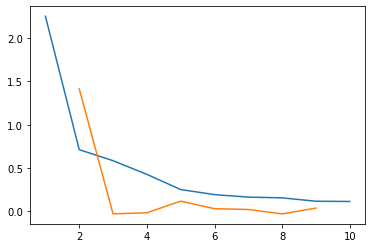

Рекомендованное количество кластеров: 2


In [36]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

In [37]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

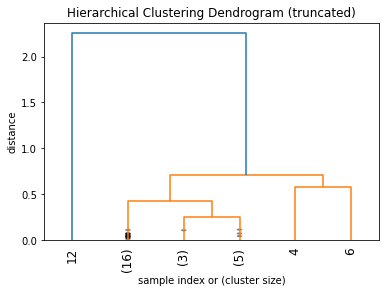

In [38]:
# !!!!!!!!! укажите, какое количество кластеров будете использовать!
nClust=6

#строим дендрограмму 
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nClust, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

In [39]:
# иерархическая кластеризация
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([3, 3, 1, 1, 4, 1, 5, 1, 2, 1, 1, 1, 6, 1, 3, 2, 1, 1, 1, 1, 1, 1,
       3, 2, 1, 1, 3], dtype=int32)

In [40]:
col

['Офшорні статки',
 'ВВП на душу насел',
 'Загальні податкові втрати',
 'Втрати від под. уникнення',
 'Втрати від под. ухилення',
 'Податк. надходження']

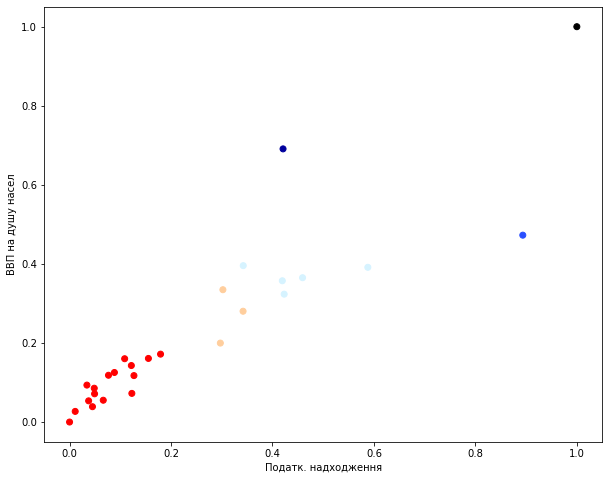

In [41]:
x=5 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=1 #
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

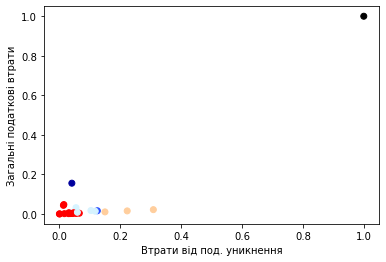

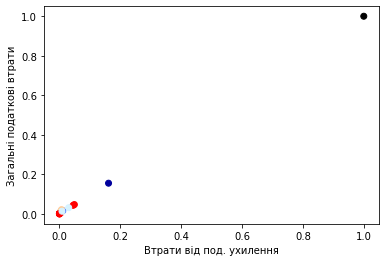

In [42]:
x=3 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=2 #
plt.figure(figsize=(6, 4))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

x=4 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=2 #
plt.figure(figsize=(6, 4))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

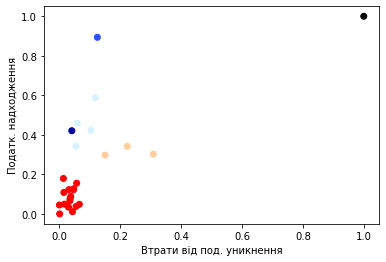

In [43]:
x=3 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=5 #
plt.figure(figsize=(6, 4))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [44]:
# к оригинальным данным добавляем номер кластера
df['I']=clusters
res=df.groupby('I')[col].mean()
res['Количество']=df.groupby('I').size().values
res #ниже средние цифры по кластерам и количество объектов (Количество)

,Офшорні статки,ВВП на душу насел,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,Количество
I,,,,,,,
1,7265.550210,19910.5625,162.733325,34.225604,128.507721,4037.443128,16
2,4057.373158,38976.0000,312.834632,220.056993,92.777639,10661.420533,3
3,8753.129449,49141.6000,304.303692,74.247281,230.056411,14409.561103,5
4,7066.733072,60494.0000,319.457344,122.052712,197.404632,27047.243287,1
5,125178.887539,83850.0000,3046.305667,41.941359,3004.364307,13686.173029,1
6,813101.818939,116921.0000,19570.584732,959.767058,18610.817675,30058.989453,1


In [45]:
df[df['I']==5] # !!!!! меняйте номер кластера

,Країна,Офшорні статки,ВВП на душу насел,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,I
6,Ірландія,125178.887539,83850,3046.305667,41.941359,3004.364307,13686.173029,5


In [46]:
df[df['I']==6] # !!!!! меняйте номер кластера

,Країна,Офшорні статки,ВВП на душу насел,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,I
12,Люксембург,813101.818939,116921,19570.584732,959.767058,18610.817675,30058.989453,6


In [47]:
df[df['I']==2] # !!!!! меняйте номер кластера

,Країна,Офшорні статки,ВВП на душу насел,Загальні податкові втрати,Втрати від под. уникнення,Втрати від под. ухилення,Податк. надходження,I
8,Італія,2761.864595,31288,205.437420,146.049191,59.388229,10191.999083,2
15,Німеччина,5795.701595,45733,428.550425,298.152224,130.398201,10333.961753,2
23,Франція,3614.553283,39907,304.516052,215.969564,88.546488,11458.300763,2
